<h3>Data Prepration</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd

<module 'pandas' from '/home/codespace/.local/lib/python3.12/site-packages/pandas/__init__.py'>

In [3]:
np

<module 'numpy' from '/home/codespace/.local/lib/python3.12/site-packages/numpy/__init__.py'>

In [4]:
data = 'Link'

In [5]:
!wget $data

--2025-10-12 03:14:53--  http://link/
Resolving link (link)... failed: No address associated with hostname.
wget: unable to resolve host address ‘link’


In [6]:
df = pd.read_csv('data.csv')

In [7]:
# Transpose the Dataframe to see all cloumns of the Dataframe
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
# Data prepration changing all cloumns and values to standard form
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
df.dtypes
# The total charges is object but it have to be number

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
# Changing the 'totalcharges' column to number
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
# The error part is because of the null values that filled with '_' in previous step so we have to ignore them

In [12]:
df.totalcharges.isnull().sum()

np.int64(11)

In [13]:
# Filling the missing values with '0'
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
df.totalcharges.isnull().sum()

np.int64(0)

In [15]:
# We have to turn the churn column to '0' or '1' instead of 'yes' or 'no' for understanding of the model
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

<h3>Setup the validation framework</h3>
<h5>Working with 'scikit'</h5>

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
# See the documents
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [19]:
# Split the Dataframe into 80% train Dataframe and 20% test Dataframe
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [20]:
len(df_full_train), len(df_test)

(5634, 1409)

In [21]:
# Split the full train part to 'train' and 'validation' Dataframes
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [23]:
# After the shuffle in previous steps we have to reset the index of the Dataframes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
# Making the 'y' of the Dataframes
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [25]:
# Removing churn from the Dataframes
del df_train['churn']
del df_val['churn']
del df_test['churn']

<h3>EDA</h3>

In [26]:
df_full_train = df_full_train.reset_index(drop=True)

In [27]:
# Checking for anu null values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
# This functon calculate number of any values in any column
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

<p>The '1' percentage is called the churn rate</p>

In [29]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

np.float64(0.26996805111821087)

In [30]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

<h5>The 'seniorcitizen' field that shows its type is 'int64' is wrong and it's a object</h5>

In [31]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [32]:
categorical =['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [33]:
df_full_train[categorical].nunique()
# Columns with 2 unique types are binary 

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

<h4>Feature Importance</h4>

In [34]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()

<p>Churn rate for female cusstomers</p>

In [35]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

In [36]:
print(churn_female)
print(churn_male)
print(global_churn_rate)

0.27682403433476394
0.2632135306553911
0.26996805111821087


In [37]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [38]:
df_full_train[df_full_train.partner == 'yes'].churn.mean()

np.float64(0.20503330866025166)

In [39]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()

In [40]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()

In [41]:
print(churn_no_partner)
print(churn_partner)
print(global_churn_rate)

0.3298090040927694
0.20503330866025166
0.26996805111821087


In [42]:
print(global_churn_rate - churn_female)
print(global_churn_rate - churn_male)
print(global_churn_rate - churn_no_partner)
print(global_churn_rate - churn_partner)

-0.006855983216553063
0.006754520462819769
-0.05984095297455855
0.06493474245795922


<p>The bigger the number is it has more impact on the churn rate of the customer</p>

<h4>Risk ratio</h4>

In [43]:
churn_no_partner / global_churn_rate

np.float64(1.2216593879412643)

<p>Customer with no partner has higher ratio of churn</p>

In [44]:
churn_partner / global_churn_rate

np.float64(0.7594724924338315)

    SELECT
        gender,
        AVG(churn),
        AVG(churn) - global_churn AS diff,
        AVG(churn) / global_churn AS risk
    FROM
        date
    GROUP BY
        gender;


In [45]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [46]:
from IPython.display import display

In [47]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


<h4>Mutual Information</h4>

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
mutual_info_score(df_full_train.churn,df_full_train.contract)

0.0983203874041556

In [50]:
mutual_info_score(df_full_train.contract,df_full_train.churn)
# Order of variable is not important at this function

0.0983203874041556

<h4>The mutual information has complicated formula but it is calculating how much two variable depends to eachother</h4>

In [51]:
mutual_info_score(df_full_train.gender,df_full_train.churn)

0.0001174846211139946

In [52]:
mutual_info_score(df_full_train.partner,df_full_train.churn)

0.009967689095399745

<h5>The bigger result shows the feature is more important</h5>

https://en.wikipedia.org/wiki/Mutual_information

In [53]:
# Building an function to calculate the mutual inforamtion score of every feature
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [156]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)

In [157]:
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

<h3>Feature Importance:Correlation</h3>

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [56]:
df_full_train.tenure.max()

np.int64(72)

In [57]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

<p>
    It means increase of the 'tenure' decrase the churn rate
    And the sama with the 'totalcharges'
    Moreover the more 'monthlycharges' go the churn rate is going up to
</p>

In [58]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [59]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [60]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure < 12)].churn.mean()

np.float64(0.4059003051881994)

In [61]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

<p>The tenure more than 12 months has a great impact on churn rate</p>

In [62]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [63]:
df_full_train[df_full_train.monthlycharges > 20].churn.mean()

np.float64(0.28859323028761497)

In [64]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges < 50)].churn.mean()

np.float64(0.1836890243902439)

In [65]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

<p>It means growing 'monthlycarges' decreases the churn rate</p>

<h3>On-hot encoding</h3>

In [66]:
from sklearn.feature_extraction import DictVectorizer

In [67]:
df_train[['gender','contract', 'tenure']].iloc[:10]

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
5,male,month-to-month,4
6,male,month-to-month,1
7,female,month-to-month,1
8,female,two_year,72
9,female,month-to-month,6


In [68]:
# Trun Dataframe data into dictioneries
df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [69]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [70]:
dv = DictVectorizer(sparse=False)

In [71]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [72]:
dv.get_feature_names_out(train_dicts)

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [73]:
# The columns mapped to features on top in order
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [74]:
# Combination of the method to build 'X_train' 
X_train = dv.fit_transform(train_dicts)

In [75]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [76]:
X_train.shape

(4225, 45)

In [77]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [78]:
X_val = dv.transform(val_dicts)

In [79]:
X_val.shape

(1409, 45)

<h3>Logistic Regression</h3>

In [80]:
# The formula for 'sigmoid' a function to calculate the model answer beetwen one and zero
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [81]:
# Make list of 51 numbers beetwen -5 and 5 
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [82]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

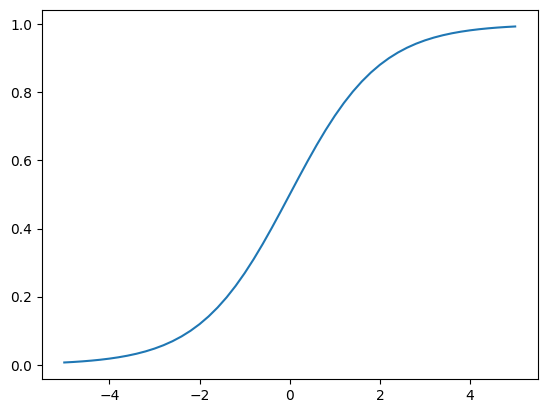

In [83]:
plt.plot(z, sigmoid(z))

<h4>Linear Regression Formula</h4>

In [84]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

<h4>Logistic Regression Formula</h4>

In [85]:
def logistic_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    result = sigmoid(result)
    return result

<h3>Traning logistic regression with Scikit-Learn</h3>

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [88]:
# It is the 'w0' variable
model.intercept_[0]

np.float64(-0.1109287445794238)

In [89]:
# These are 'w' (weights) 
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [90]:
# Hard predictios
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

<p>At this point we could predict if they chutn ot not but not the probability of churn</p>

In [91]:
# Soft predictions
model.predict_proba(X_train)

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]], shape=(4225, 2))

In [92]:
# The first column of the last matrix is probability of not churning so we don't need them and we just need probability of churngin in the second column 
model.predict_proba(X_train)[:, 1]

array([0.08911312, 0.66871172, 0.63770441, ..., 0.51223683, 0.03006521,
       0.7028991 ], shape=(4225,))

In [93]:
y_pred = model.predict_proba(X_val)[:,1]

In [94]:
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [95]:
churn_decision = (y_pred >= 0.5)

In [96]:
# People who has churn probability of more than 50%
df_val[churn_decision].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15


In [97]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 322, dtype: object

<p>This part is for testing the model</p>

In [98]:
# Calculate accuracy of the model
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [99]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [100]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [101]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [102]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [103]:
df_pred

,probability,prediction,actual,correct
0,0.007863,0,0,True
1,0.209928,0,0,True
2,0.223710,0,0,True
3,0.561123,1,1,True
4,0.219586,0,0,True
...,...,...,...,...
1404,0.297790,0,0,True
1405,0.035463,0,1,False
1406,0.150149,0,0,True
1407,0.776681,1,1,True


In [104]:
df_pred.correct.astype(int).mean()

np.float64(0.801277501774308)

<h3>Model Interpretation</h3>

In [105]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [106]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [107]:
# This part is to show haow ZIP function works
a = [1,2,3,4]
b = 'abcd'
print(list(zip(a,b)))
print(dict(zip(a,b)))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]
{1: 'a', 2: 'b', 3: 'c', 4: 'd'}


In [108]:
# See the values for each feature and possibility
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

In [109]:
# Make a smaller model
small = ['contract', 'tenure', 'monthlycharges']

In [110]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [111]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [112]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [113]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [114]:
X_train_small = dv_small.transform(dicts_train_small)
X_val_small = dv_small.transform(dicts_val_small)

In [115]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [116]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [117]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [118]:
dict(zip(dv_small.get_feature_names_out(),w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [119]:
# An example to understading of the numbers
# The example is for customer with month to month contract and 50$ monthly chargens and 5 months tenure
# The w0 is always '-2.47' as we calculated in top
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [120]:
# '_' symbol stands for output of the last cell
sigmoid(_)

np.float64(0.41824062315816374)

<h4>The negetive and posetive numbers shows how they affect the result</h4>
<h4>Like when tenure has negetive number more tenure decrese the churn probability</h4>

<h3>Using the Model</h3>

In [121]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [123]:
dicts_full_train[:1]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35}]

In [124]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [125]:
y_full_train = df_full_train.churn.values

In [126]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [128]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [130]:
X_test = dv.transform(dicts_test)

In [134]:
y_pred = model.predict_proba(X_test)[:,1]

In [135]:
churn_decision = (y_pred >= 0.5)

In [136]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [147]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [148]:
X_small = dv.transform([customer])
X_small

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [149]:
X_small.shape

(1, 45)

In [150]:
model.predict_proba(X_small)[0,1]

np.float64(0.6613470087309817)

In [153]:
y_test[-1]

np.int64(1)